In [1]:
import os
import sys
from pathlib import Path

curr_dir = Path(os.getcwd())

sys.path.append(str(curr_dir.parent.parent.absolute()))

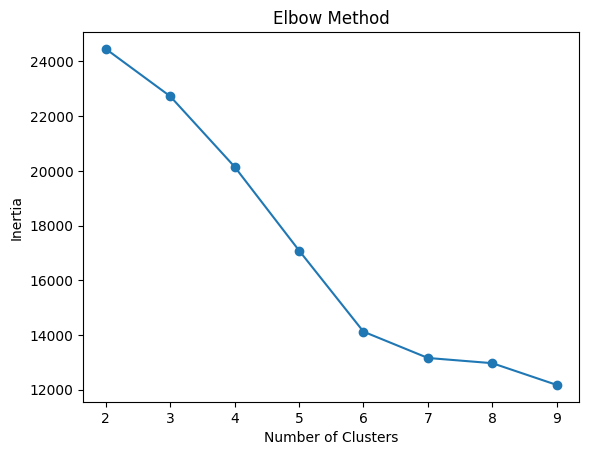

Silhouette Score: 0.2810472271610995


/tmp/ipykernel_2388/3057494313.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cluster"] = kmeans.fit_predict(scaled_df)


In [2]:
import sys
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

from stocks.resource import camel_to_snake, StocksDataAPI


df = StocksDataAPI().stock_info



# Select relevant features for clustering
features = list(
    map(
        camel_to_snake,
        [
            "marketCap",
            "enterpriseValue",
            "totalRevenue",
            "ebitda",
            "freeCashflow",
            "priceToBook",
            "priceToSalesTrailing12Months",
            "enterpriseToRevenue",
            "enterpriseToEbitda",
            "trailingPE",
            "profitMargins",
            "grossMargins",
            "ebitdaMargins",
            "operatingMargins",
            "earningsGrowth",
            "revenueGrowth",
            "earningsQuarterlyGrowth",
            "netIncomeToCommon",
            "trailingEps",
            "debtToEquity",
            "quickRatio",
            "currentRatio",
            "returnOnAssets",
            "returnOnEquity",
            "beta",
            "fiftyTwoWeekLow",
            "fiftyTwoWeekHigh",
            "fiftyDayAverage",
            "twoHundredDayAverage",
        ],
    )
)

# Filter out stocks with missing values in the selected features
df_filtered = df.dropna(subset=features)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_filtered[features])

# Convert scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)


# Plot the elbow curve
plt.plot(range(2, 10), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Based on the elbow method, choose an optimal number of clusters
optimal_clusters = 7  # choice based on elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_filtered["Cluster"] = kmeans.fit_predict(scaled_df)

# Calculate silhouette score to evaluate clustering quality
sil_score = silhouette_score(scaled_df, df_filtered["Cluster"])
print(f"Silhouette Score: {sil_score}")

In [3]:
df_filtered

,Unnamed: 0,symbol,name_of_company,series,date_of_listing,isin_number,industry_key,sector_key,macro,basic_industry,...,gross_margins,ebitda_margins,operating_margins,return_on_assets,return_on_equity,long_business_summary,beta,recommendation_key,market_cap_rank,Cluster
0,0,POLYPLEX,Polyplex Corporation Limited,EQ,11-APR-2003,INE633B01018,specialty-chemicals,basic-materials,Industrials,Packaging,...,0.27249,0.07046,0.01120,0.01157,0.01492,Polyplex Corporation Limited manufactures and ...,0.894,none,834.0,1
1,1,BIOFILCHEM,Biofil Chemicals & Pharmaceuticals Limited,EQ,12-JUN-1996,INE829A01014,drug-manufacturers-specialty-generic,healthcare,Healthcare,Pharmaceuticals,...,0.06314,0.03263,0.01945,0.01444,0.03995,Biofil Chemicals and Pharmaceuticals Limited e...,2.519,none,1773.0,1
3,3,DONEAR,Donear Industries Limited,EQ,20-DEC-2006,INE668D01028,textile-manufacturing,consumer-cyclical,Consumer Discretionary,Other Textile Products,...,0.48058,0.10124,0.10838,0.06311,0.18482,Donear Industries Limited primarily engages in...,0.600,none,1314.0,1
8,8,TVSELECT,TVS Electronics Limited,EQ,26-DEC-2003,INE236G01019,computer-hardware,technology,Information Technology,Computers Hardware & Equipments,...,0.45320,0.01281,-0.00412,-0.00333,0.00269,"TVS Electronics Limited, through its subsidiar...",1.265,none,1343.0,1
9,9,POLYCAB,Polycab India Limited,EQ,16-APR-2019,INE455K01017,electrical-equipment-parts,industrials,Industrials,Cables - Electricals,...,0.25759,0.13259,0.10989,0.13046,0.23365,Polycab India Limited manufactures and sells w...,0.708,buy,101.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,1966,COALINDIA,Coal India Limited,EQ,04-NOV-2010,INE522F01014,other_industry,other_sector,Energy,Coal,...,0.71106,0.36809,0.27271,0.11483,0.52782,"Coal India Limited, together with its subsidia...",0.276,buy,28.0,5
1968,1968,NARMADA,Narmada Agrobase Limited,BE,27-OCT-2022,INE117Z01011,other_industry,other_sector,Fast Moving Consumer Goods,Animal Feed,...,0.14244,0.05003,0.05761,0.05068,0.06219,Narmada Agrobase Limited manufactures and sell...,-0.329,none,1889.0,1
1973,1973,ESCORTS,Escorts Kubota Limited,EQ,01-MAR-1995,INE042A01014,other_industry,other_sector,Industrials,Tractors,...,0.30459,0.13112,0.10851,0.05916,0.12090,Escorts Kubota Limited manufactures and sells ...,0.242,hold,190.0,1
1975,1975,LIBAS,Libas Consumer Products Limited,EQ,23-JUL-2019,INE908V01012,other_industry,other_sector,Consumer Discretionary,Garments & Apparels,...,0.08139,-0.00768,-0.11333,-0.00496,0.06888,Libas Consumer Products Limited engages in the...,0.284,none,1855.0,1


In [4]:
df_filtered.groupby("Cluster").size()

Cluster
0    204
1    669
2      1
3      2
4      1
5     10
6      1
dtype: int64

In [5]:
# Analyze the characteristics of each cluster
cluster_summary = df_filtered.groupby("Cluster").describe().transpose()
cluster_summary

Cluster                          0            1       2            3       4  \
Unnamed: 0      count   204.000000   669.000000     1.0     2.000000     1.0   
                mean   1047.142157   949.207773   338.0  1521.500000  1683.0   
                std     548.055842   556.157702     NaN   260.922402     NaN   
                min       9.000000     0.000000   338.0  1337.000000  1683.0   
                25%     602.750000   455.000000   338.0  1429.250000  1683.0   
...                            ...          ...     ...          ...     ...   
market_cap_rank min      15.000000    22.000000  1180.0     6.000000   157.0   
                25%     193.250000   588.000000  1180.0     7.500000   157.0   
                50%     432.500000   981.000000  1180.0     9.000000   157.0   
                75%     860.000000  1377.000000  1180.0    10.500000   157.0   
                max    1727.000000  1911.000000  1180.0    12.000000   157.0   

Cluster                         5       6  
Unnamed: 0      count   10.000000     1.0  
                mean   785.700000   644.0  
                std    550.150293     NaN  
                min    195.000000   644.0  
                25%    330.750000   644.0  
...                           ...     ...  
market_cap_rank min      2.000000  1337.0  
                25%     11.000000  1337.0  
                50%     16.500000  1337.0  
                75%     25.000000  1337.0  
                max     37.000000  1337.0  

[544 rows x 7 columns]

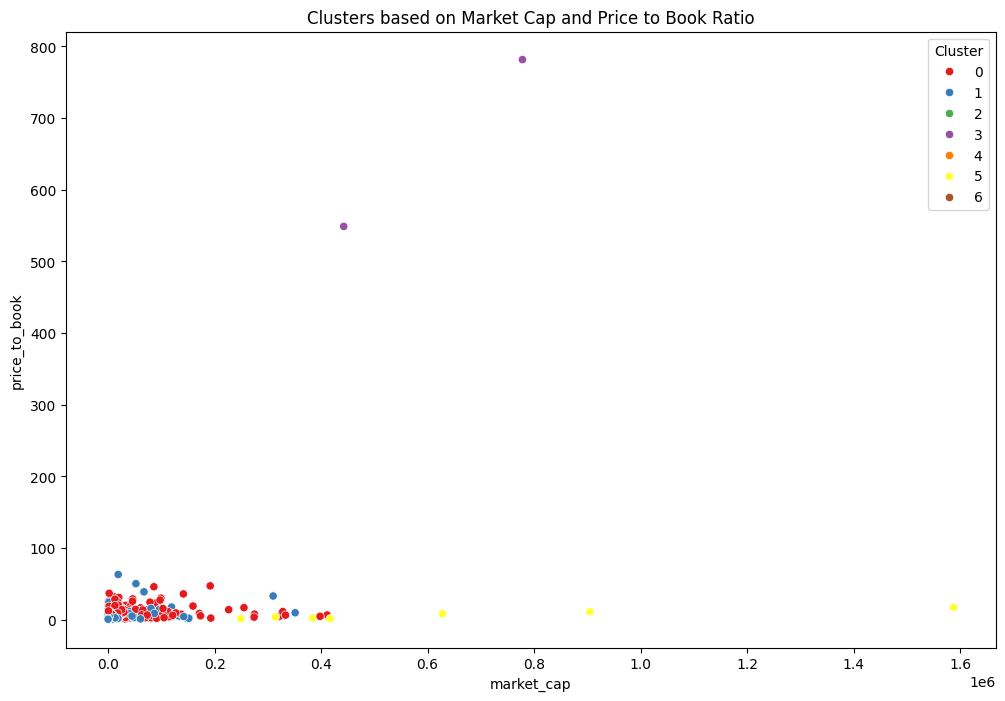

In [6]:
# Example visualization of clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="market_cap", y="price_to_book", hue="Cluster", data=df_filtered, palette="Set1"
)
plt.title("Clusters based on Market Cap and Price to Book Ratio")
plt.show()